In [155]:
import joblib

model=joblib.load('brain_tumor_kmeans.sav')
tumorLabel=4

In [156]:
import cv2

imagePath='test_images/0 (239).jpg'

imgOriginal=cv2.imread(imagePath)
img=cv2.imread(imagePath,0)
height,width=img.shape
imgFlatten=img.reshape(height*width,1)

In [157]:
labels=model.predict(imgFlatten)
labels2D=labels.reshape(height,width)

In [158]:
mask=(labels2D==tumorLabel)

In [159]:
import numpy as np

array=np.array([2,547,5,7,87,8,5])
print(array==5)

[False False  True False False False  True]


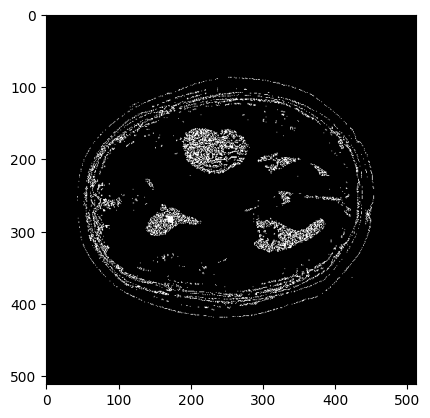

In [160]:
tumorExtracted=np.bitwise_and(mask,img)

from matplotlib import pyplot as plt

plt.imshow(tumorExtracted,cmap='gray')
plt.show()

In [161]:
contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print('no. contours:',len(contours))

for cnt in contours:
    #cv2.drawContours(frame, [cnt], 0, (0,255,255), 3)
    area=cv2.contourArea(cnt)
    #print(area)
    if(area>500):

        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(imgOriginal,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(imgOriginal,(x,y),(x+120,y-40),(0,255,0),-1)
        cv2.putText(imgOriginal,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)

no. contours: 1789


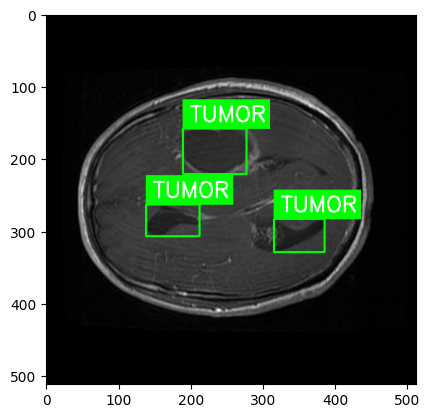

In [162]:
plt.imshow(imgOriginal,cmap='gray')
plt.show()